# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Exploration des données

Le dataset étant composé de 5 variantes représentant les mêmes commentaires analysés à des moments différents. J'ai choisi de traiter séparemment chaque variante, comme le fait le créateur du dataset.  
La première étape consiste à déterminer le nom de chaque colonne comme précisé dans le détail du dataset.

In [3]:
columns = ['likes', 'checkins', 'returns', 'category',
           'commBef min', 'commBef max', 'commBef avg', 'commBef med', 'commBef std',
           'comm24 min', 'comm24 max', 'comm24 avg', 'comm24 med', 'comm24 std',
           'comm48 min', 'comm48 max', 'comm48 avg', 'comm48 med', 'comm48 std',
           'comm24Bef min', 'comm24Bef max', 'comm24Bef avg', 'comm24Bef med', 'comm24Bef std',
           'diff2448 min', 'diff2448 max', 'diff2448 avg', 'diff2448 med', 'diff2448 std',
           'commBef', 'comm24', 'comm48', 'comm24Bef', 'diff2448', 'baseTime',
           'length', 'shares','promoted', 'hrs',
           'sun_pub', 'mon_pub', 'tue_pub', 'wed_pub', 'thu_pub', 'fri_pub','sat_pub', 
           'sun_base', 'mon_base', 'tue_base', 'wed_base', 'thu_base','fri_base', 'sat_base', 
           'output']

In [4]:
df = []
for i in range(1,6):
  df.append(pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/Python for Data Analysis/Features_Variant_{i}.csv", names = columns))

In [5]:
df[0].head(10)

,likes,checkins,returns,category,commBef min,commBef max,commBef avg,commBef med,commBef std,comm24 min,comm24 max,comm24 avg,comm24 med,comm24 std,comm48 min,comm48 max,comm48 avg,comm48 med,comm48 std,comm24Bef min,comm24Bef max,comm24Bef avg,comm24Bef med,comm24Bef std,diff2448 min,diff2448 max,diff2448 avg,diff2448 med,diff2448 std,commBef,comm24,comm48,comm24Bef,diff2448,baseTime,length,shares,promoted,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,60,166,1,0,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,68,145,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,1,1,-1,32,157,2,0,24,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,35,177,5,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,48,126,1,0,24,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [6]:
df[4].describe()

,likes,checkins,returns,category,commBef min,commBef max,commBef avg,commBef med,commBef std,comm24 min,comm24 max,comm24 avg,comm24 med,comm24 std,comm48 min,comm48 max,comm48 avg,comm48 med,comm48 std,comm24Bef min,comm24Bef max,comm24Bef avg,comm24Bef med,comm24Bef std,diff2448 min,diff2448 max,diff2448 avg,diff2448 med,diff2448 std,commBef,comm24,comm48,comm24Bef,diff2448,baseTime,length,shares,promoted,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.0,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,381.498875,21.814581,7.169547,40.514099,0.005813,380.723414,19.992318,4.875697,40.712302,0.468638,434.881862,52.753746,33.607883,63.461284,-326.27523,377.322770,1.822263,-2.119153,56.540260,55.901120,21.814581,19.992318,52.753746,1.822263,35.449972,163.692092,117.363337,0.0,23.783274,0.122484,0.143380,0.149465,0.157323,0.144184,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,439.633930,35.693010,19.700529,51.560522,0.872334,430.182784,31.567901,13.071671,52.598249,13.125510,490.729733,81.019821,64.177946,76.836383,380.14493,436.702185,9.689963,10.487990,74.583028,137.524122,74.658414,73.624779,128.434403,94.092191,21.005670,375.663067,954.359456,0.0,1.827157,0.327845,0.350461,0.356547,0.364106,0.351277,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2038.00000,-101.000000,-184.400000,-175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2038.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,41.000000,2.022447,0.000000,4.673982,0.000000,40.000000,2.008104,0.000000,4.718116,0.000000,44.000000,5.244733,2.000000,7.555776,-477.00000,41.000000,-0.041225,-2.000000,6.627715,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,187.000000,8.706061,2.000000,19.001847,0.000000,205.000000,8.209101,1.000000,19.769751,0.000000,231.000000,21.677140,11.000000,31.014726,-172.00000,182.000000,0.252852,0.000000,25.575189,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.00

In [7]:
df[2].describe()

,likes,checkins,returns,category,commBef min,commBef max,commBef avg,commBef med,commBef std,comm24 min,comm24 max,comm24 avg,comm24 med,comm24 std,comm48 min,comm48 max,comm48 avg,comm48 med,comm48 std,comm24Bef min,comm24Bef max,comm24Bef avg,comm24Bef med,comm24Bef std,diff2448 min,diff2448 max,diff2448 avg,diff2448 med,diff2448 std,commBef,comm24,comm48,comm24Bef,diff2448,baseTime,length,shares,promoted,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
count,1.210980e+05,121098.000000,1.210980e+05,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.00000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.0,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000,121098.000000
mean,1.314636e+06,4668.113528,4.476980e+04,24.252184,0.734166,480.270979,55.912715,35.244149,68.265431,0.088854,349.925333,21.855778,7.205982,40.385457,0.002271,363.372161,20.032907,4.910601,40.791401,0.728171,434.238592,52.749054,33.64186,63.637758,-310.655469,344.259864,1.822871,-2.230648,56.598107,55.912715,21.855778,20.032907,52.749054,1.822871,35.423583,163.476853,117.394614,0.0,23.778758,0.122430,0.143074,0.149623,0.157525,0.143999,0.146427,0.136922,0.139507,0.134098,0.137682,0.146898,0.155188,0.144618,0.142009,7.103668
std,6.825200e+06,20554.738011,1.110178e+05,19.943566,13.099364,534.266210,86.605466,68.703258,82.870836,3.149702,418.249112,35.989552,18.480889,52.139951,0.353404,434.944065,31.056001,15.443522,52.167238,13.027472,490.416032,81.012915,64.85783,77.300905,388.872159,417.112783,12.826990,13.152147,74.353421,137.943067,75.132023,73.142656,128.795652,94.320385,20.915451,374.103086,950.660185,0.0,1.845365,0.327783,0.350150,0.356703,0.364297,0.351090,0.353535,0.343767,0.346476,0.340759,0.344567,0.354005,0.362086,0.351717,0.349061,33.468797
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2011.000000,-48.000000,-584.666667,-1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2011.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.314050,2.000000,8.024092,0.000000,38.000000,2.063973,0.000000,4.801859,0.000000,35.000000,1.882155,0.000000,4.783300,0.000000,44.000000,5.033058,2.00000,7.688240,-428.000000,36.000000,-0.265625,-2.000000,6.248644,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,244.000000,24.173494,12.000000,34.126990,0.000000,176.000000,8.694056,2.000000,18.173804,0.000000,183.000000,8.213287,1.000000,18.933186,0.000000,231.000000,21.680070,11.00000,32.032203,-135.000000,176.000000,0.201950,0.000000,25.181092,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,772.000000,71.096478,41.000000,103.5905

In [8]:
for i in df:
  print(i.isnull().all())

likes            False
checkins         False
returns          False
category         False
commBef min      False
commBef max      False
commBef avg      False
commBef med      False
commBef std      False
comm24 min       False
comm24 max       False
comm24 avg       False
comm24 med       False
comm24 std       False
comm48 min       False
comm48 max       False
comm48 avg       False
comm48 med       False
comm48 std       False
comm24Bef min    False
comm24Bef max    False
comm24Bef avg    False
comm24Bef med    False
comm24Bef std    False
diff2448 min     False
diff2448 max     False
diff2448 avg     False
diff2448 med     False
diff2448 std     False
commBef          False
comm24           False
comm48           False
comm24Bef        False
diff2448         False
baseTime         False
length           False
shares           False
promoted         False
hrs              False
sun_pub          False
mon_pub          False
tue_pub          False
wed_pub          False
thu_pub    

Les données étant déjà nettoyées, il faut à présent déterminer les colonnes les plus pertinentes pour notre prédiction.

In [9]:
corr_matrix = []
for i in df:
  corr_matrix.append(i.corr())

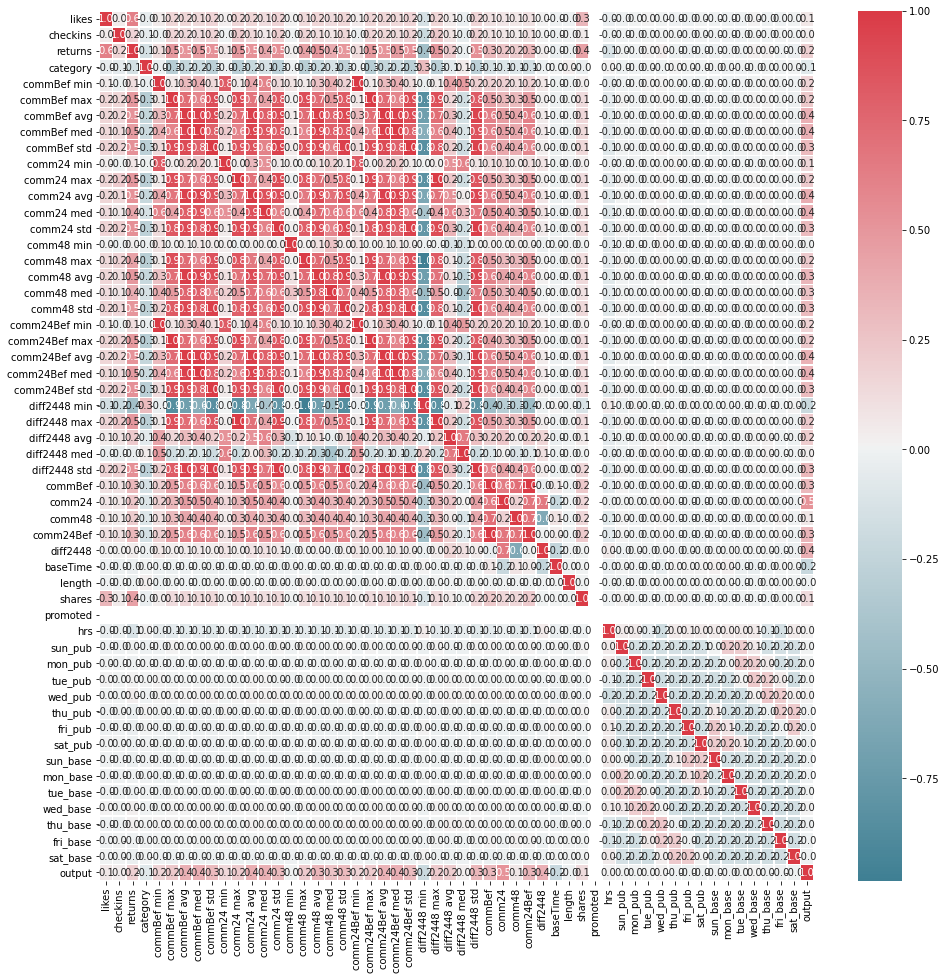

In [10]:
f,ax = plt.subplots(figsize=(16, 16))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_matrix[1],annot=True,cmap=colormap, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [11]:
df_corr = pd.DataFrame()

for matrix in corr_matrix:
  df_corr = df_corr.append(pd.Series(matrix["output"].sort_values(ascending=False)), ignore_index=True)
  
df_corr

,baseTime,category,checkins,comm24,comm24 avg,comm24 max,comm24 med,comm24 min,comm24 std,comm24Bef,comm24Bef avg,comm24Bef max,comm24Bef med,comm24Bef min,comm24Bef std,comm48,comm48 avg,comm48 max,comm48 med,comm48 min,comm48 std,commBef,commBef avg,commBef max,commBef med,commBef min,commBef std,diff2448,diff2448 avg,diff2448 max,diff2448 med,diff2448 min,diff2448 std,fri_base,fri_pub,hrs,length,likes,mon_base,mon_pub,output,promoted,returns,sat_base,sat_pub,shares,sun_base,sun_pub,thu_base,thu_pub,tue_base,tue_pub,wed_base,wed_pub
0,-0.221962,-0.073673,0.022982,0.528696,0.344827,0.217754,0.309461,0.103345,0.297203,0.341741,0.333990,0.225908,0.324373,0.164300,0.295221,0.072088,0.317867,0.229884,0.276432,0.011900,0.296790,0.326882,0.334986,0.231432,0.325367,0.156940,0.300229,0.378453,0.162492,0.213866,-0.019504,-0.214047,0.308800,-0.001383,-0.005043,0.012584,-0.000622,0.058918,-0.000266,-0.003071,1.0,NaN,0.177330,-0.010611,-0.012229,0.139295,-0.012447,0.001449,0.007104,-0.004486,-0.000131,0.001263,0.017299,0.021169
1,-0.214879,-0.071163,0.036757,0.516760,0.373257,0.222138,0.364517,0.147960,0.305859,0.327411,0.355668,0.224798,0.360191,0.166328,0.297763,0.066398,0.329682,0.219647,0.261912,0.003232,0.305841,0.311908,0.358460,0.230391,0.361049,0.165570,0.304851,0.363991,0.212942,0.221405,0.037554,-0.204253,0.321340,-0.003789,-0.007493,0.012411,-0.002742,0.064695,-0.001477,0.000731,1.0,NaN,0.189865,-0.006214,-0.007289,0.127473,-0.010503,0.000898,0.000635,-0.005111,0.005457,0.004874,0.015722,0.012795
2,-0.227808,-0.069233,0.034535,0.549549,0.374416,0.229456,0.354237,0.107674,0.333588,0.345631,0.363097,0.237192,0.356177,0.129517,0.312110,0.071528,0.353012,0.220687,0.273203,-0.000097,0.325973,0.329624,0.365674,0.243040,0.357209,0.129312,0.318083,0.382282,0.195830,0.227463,-0.092909,-0.206581,0.341828,-0.005514,-0.010480,0.012550,-0.004719,0.066874,-0.007109,-0.005630,1.0,NaN,0.195281,-0.012873,-0.009887,0.141587,-0.006073,0.002886,0.006692,-0.004115,0.009239,0.007808,0.015120,0.018636
3,-0.224999,-0.069241,0.030113,0.532684,0.363283,0.223660,0.339253,0.161727,0.323196,0.338394,0.351077,0.232030,0.347136,0.140759,0.307541,0.074565,0.346149,0.221982,0.297422,-0.001040,0.324033,0.323056,0.353604,0.237683,0.348398,0.139863,0.313237,0.366666,0.206996,0.223635,-0.058454,-0.208630,0.332165,-0.009680,-0.010289,0.011606,0.002594,0.061297,-0.004303,-0.003777,1.0,NaN,0.190887,-0.006467,-0.006837,0.128708,-0.005954,0.001628,0.001044,-0.007996,0.006499,0.009814,0.018609,0.016722
4,-0.224366,-0.069001,0.035152,0.545260,0.368003,0.229139,0.339229,0.153853,0.329067,0.342653,0.356769,0.232497,0.348033,0.139476,0.309988,0.073260,0.356985,0.234408,0.303185,0.004411,0.333375,0.327086,0.359536,0.238743,0.349452,0.138996,0.316593,0.375318,0.192558,0.230101,-0.065052,-0.221228,0.339319,-0.007210,-0.010470,0.012255,-0.001237,0.064537,-0.003049,-0.000575,1.0,NaN,0.194768,-0.008304,-0.008114,0.124638,-0.008700,0.000587,-0.000927,-0.009496,0.004611,0.004769,0.023267,0.022337


D'après les résultats des matrices de corrélation, j'ai décidé de supprimer les colonnes ayant une corrélation entre -0.2 et 0.2.  
Cependant, certaines colonnes n'ont pas une grande influence mais me paraissent importantes comme les jours de publication et de selection de la baseTime, les catégories, la variable 'hrs' qui détermine les X prochaines heures à prédire.

# Cleaning of Data

In [12]:
for i in range(5):
  df[i].drop(labels=['checkins','comm24 min','comm24Bef min','comm48','comm48 min','commBef min','diff2448 med','length','likes','returns','shares'], axis=1, inplace=True)

In [13]:
df[0].shape

(40949, 43)

# Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

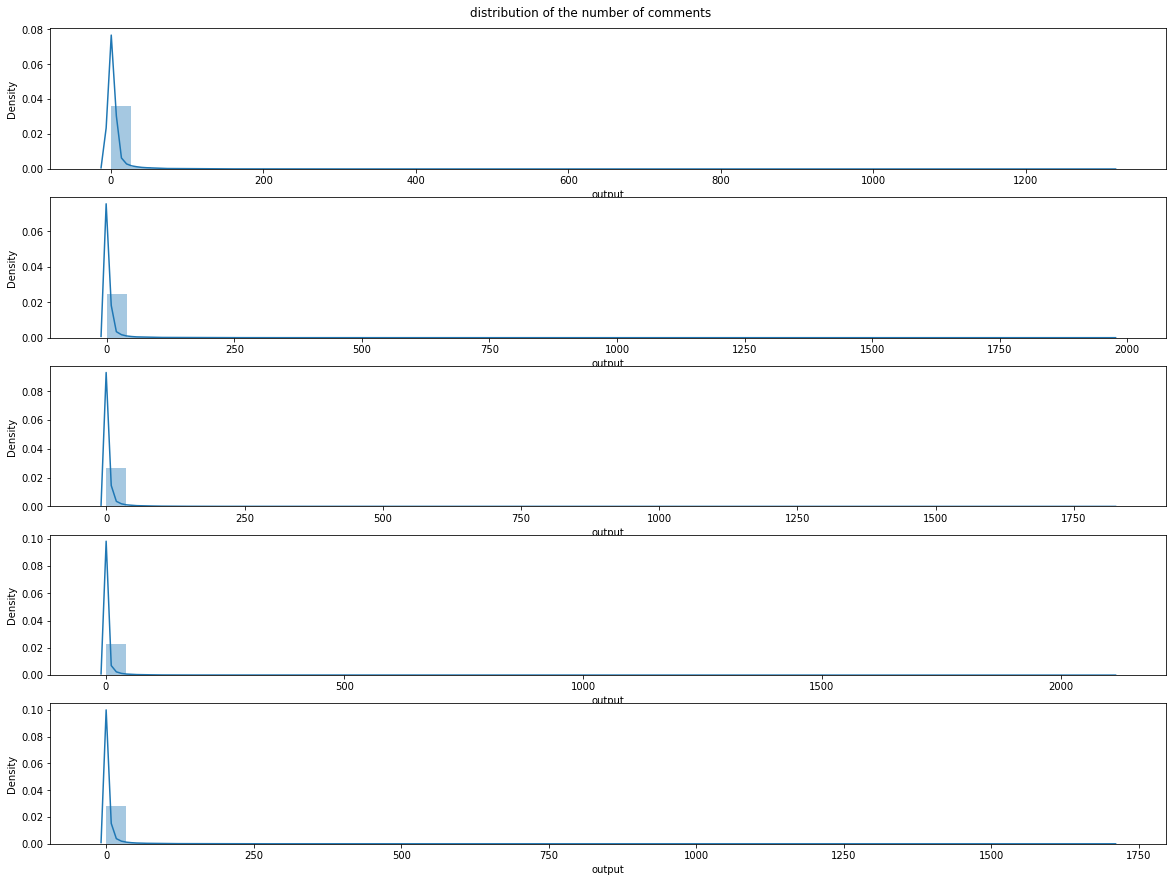

In [14]:
f,ax = plt.subplots(nrows=5,figsize=(20, 15))
f.suptitle('distribution of the number of comments',y=0.9)

for i in range(5):
  sns.distplot(df[i]['output'], ax=ax[i])

Ici, on observe la distribution du nombre commentaire final.  
On remarque que de nombreux post ont au final 0 commentaire

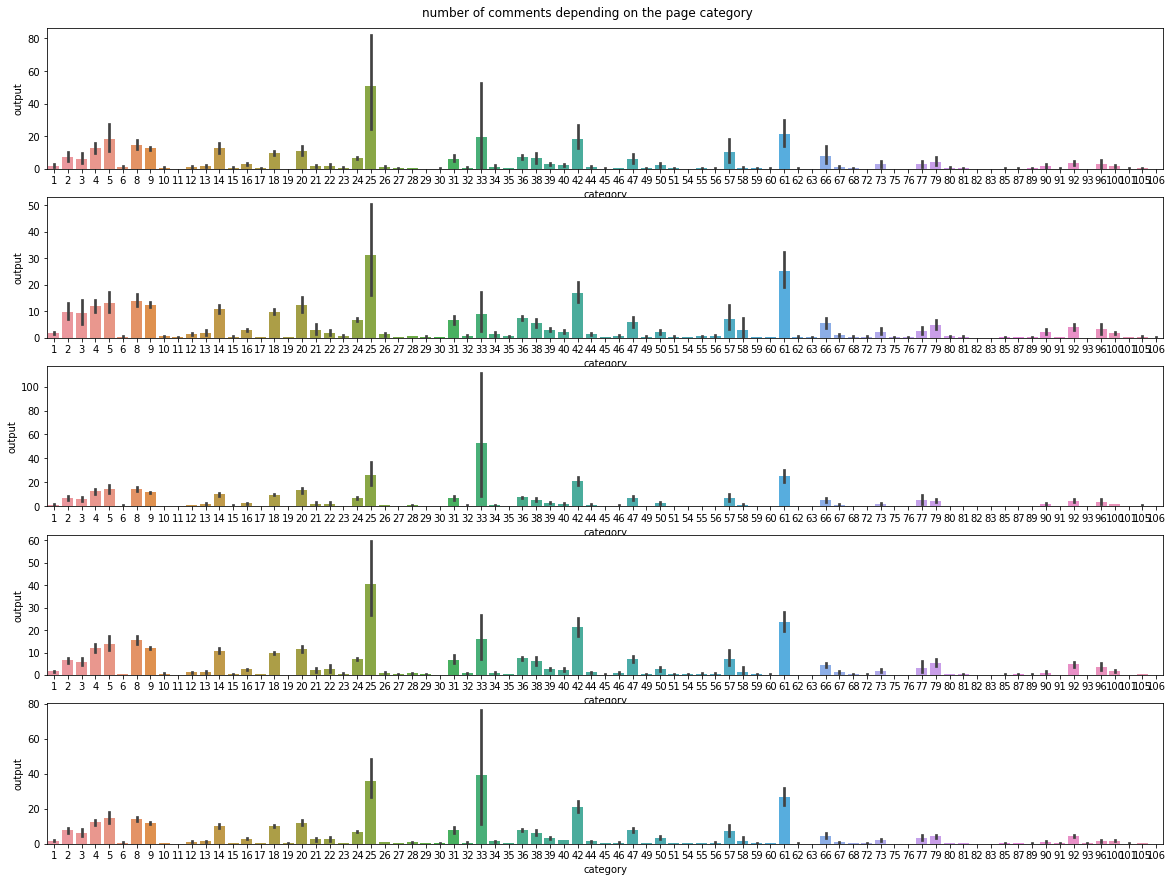

In [15]:
f,ax = plt.subplots(nrows=5,figsize=(20, 15))
f.suptitle('number of comments depending on the page category',y=0.9)

for i in range(5):
  sns.barplot(x='category', y='output', data= df[i], ax=ax[i])

On peut voir sur l'histogramme ci-dessus que selon la catégorie associée à la page, le nombre de commentaire est plus ou moins élevé.  
Bien que sur la matrice de corrélation, la catégorie semble être peu corrélée, le graphique semble confirmer que c'est tout de même une variable importante.

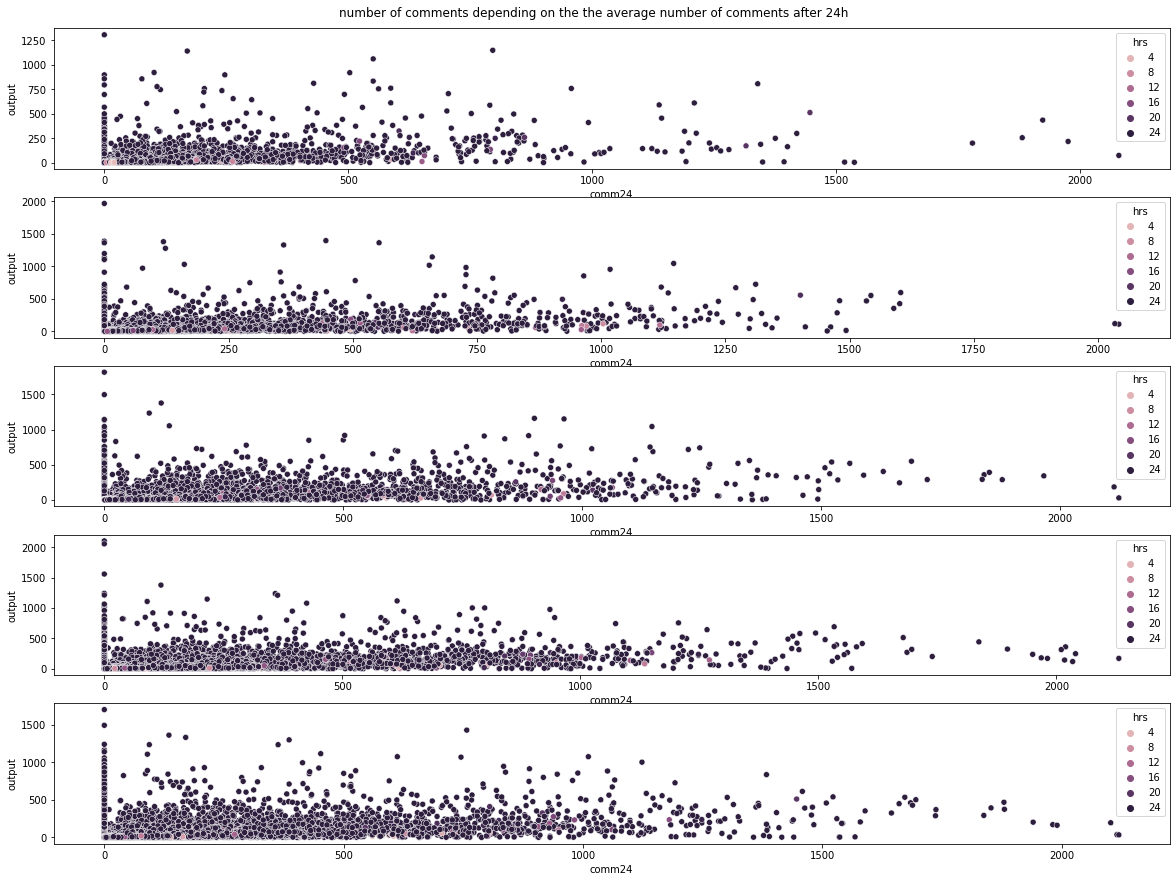

In [16]:
f,ax = plt.subplots(nrows=5,figsize=(20, 15))
f.suptitle('number of comments depending on the the average number of comments after 24h', y=0.9)

for i in range(5):
  sns.scatterplot(x='comm24',y='output', hue='hrs', data =df[i] , ax=ax[i])

Sachant que nous cherchons à prédire les commentaires pour les X prochaines heures basé sur notre baseTime (ici chaque Variante du dataset), j'ai cherché à savoir si le nombre de commentaires présents sur le post 24h avant la baseTime influe sur le nombre de commentaires à prédire.  
On peut voir que comme précedemment, il ne semble pas y avoir de forte corélation entre les variables bien que ce soit la variable la plus influente d'après la matrice de corrélation.

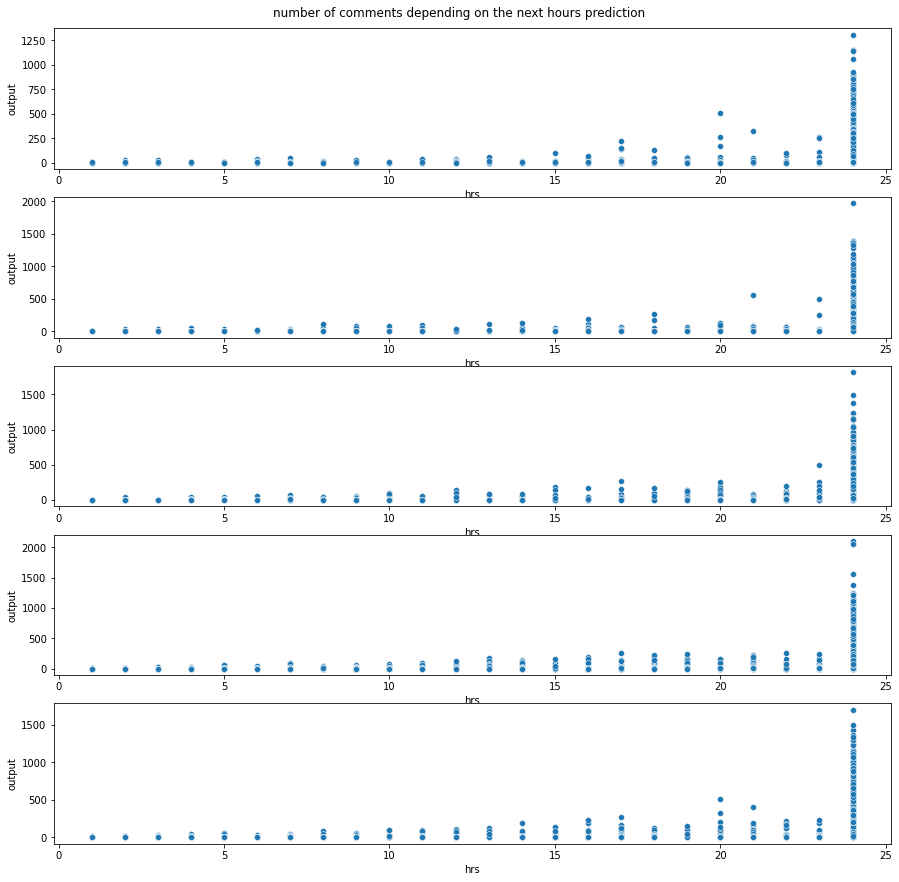

In [17]:
f,ax = plt.subplots(nrows=5,figsize=(15, 15))
f.suptitle('number of comments depending on the next hours prediction', y= 0.9)

for i in range(5):
  sns.scatterplot(x='hrs', y='output', data = df[i] , ax=ax[i])

Comme on peut s'y attendre, plus la période de prédiction est longue, plus le nombre de commentaire risque d'augmenter.

In [18]:
pub_day= []

for data in df:
  input = []
  tot_output = data['output'].sum()
  input.append(data[data.sun_pub == 1].output.sum()/tot_output)
  input.append(data[data.mon_pub == 1].output.sum()/tot_output)
  input.append(data[data.tue_pub == 1].output.sum()/tot_output)
  input.append(data[data.wed_pub == 1].output.sum()/tot_output)
  input.append(data[data.thu_pub == 1].output.sum()/tot_output)
  input.append(data[data.fri_pub == 1].output.sum()/tot_output)
  input.append(data[data.sat_pub == 1].output.sum()/tot_output)
  input.sort(reverse=True)
  pub_day.append(pd.DataFrame(input,columns = ['output'], index=['sun_pub','mon_pub', 'tue_pub', 'wed_pub', 'thu_pub', 'fri_pub','sat_pub']))

pub_day[0]

,output
sun_pub,0.194864
mon_pub,0.151932
tue_pub,0.138085
wed_pub,0.137522
thu_pub,0.136398
fri_pub,0.124649
sat_pub,0.116549


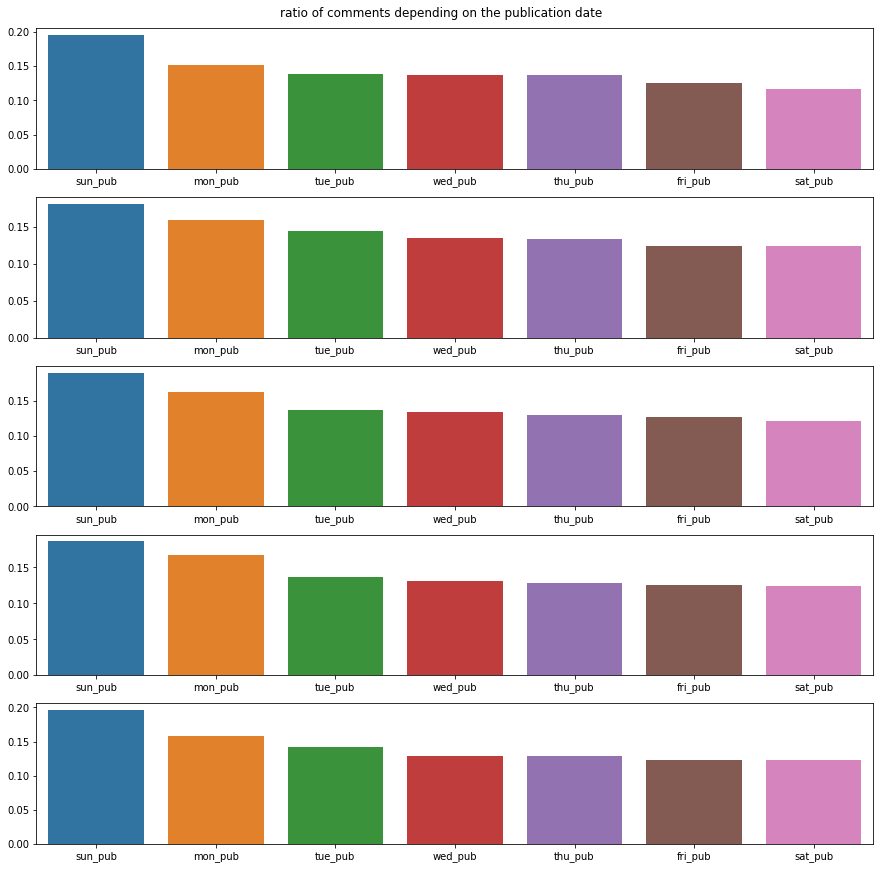

In [19]:
f,ax = plt.subplots(nrows=5,figsize=(15, 15))
f.suptitle('ratio of comments depending on the publication date', y= 0.9)

for i in range(5):

  sns.barplot(data = pub_day[i].transpose() , ax=ax[i])

L'histogramme ci-dessus, représente les jours pendant lesquels les différents posts ont été publiés. 
Pour avoir une idée plus précise, j'ai fait un ratio du nombre de commentaire par rapport au nombre total de commentaires.  
On remarque que c'est pour ceux publier un dimanche, et de manière générale en début de semaine qu'on a le plus de commentaires.

In [20]:
base_day= []

for data in df:
  input = []
  input.append(data[data.sun_base == 1].output.sum()/len(data))
  input.append(data[data.mon_base == 1].output.sum()/len(data))
  input.append(data[data.tue_base == 1].output.sum()/len(data))
  input.append(data[data.wed_base == 1].output.sum()/len(data))
  input.append(data[data.thu_base == 1].output.sum()/len(data))
  input.append(data[data.fri_base == 1].output.sum()/len(data))
  input.append(data[data.sat_base == 1].output.sum()/len(data))
  input.sort(reverse=True)
  base_day.append(pd.DataFrame(input,columns = ['output'], index=['sun_base','mon_base', 'tue_base', 'wed_base', 'thu_base', 'fri_base','sat_base']))

base_day[0]

,output
sun_base,1.306576
mon_base,1.194877
tue_base,1.036436
wed_base,1.006276
thu_base,0.967130
fri_base,0.928423
sat_base,0.883172


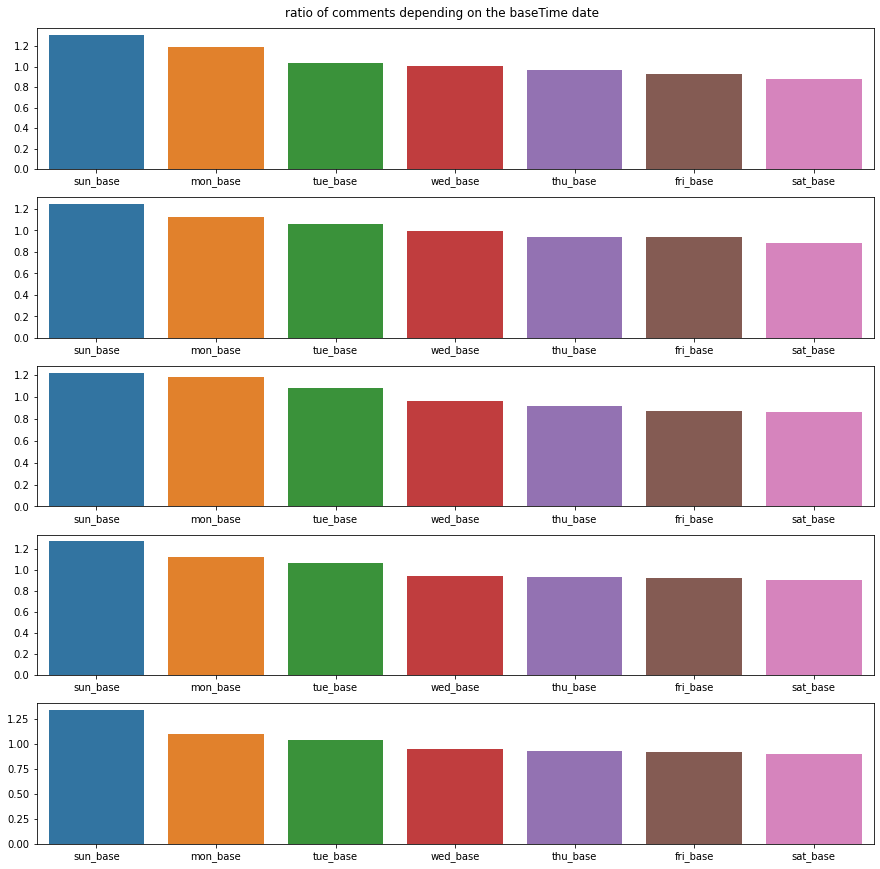

In [21]:
f,ax = plt.subplots(nrows=5,figsize=(15, 15))
f.suptitle('ratio of comments depending on the baseTime date', y= 0.9)

for i in range(5):
  sns.barplot(data = base_day[i].transpose() , ax=ax[i])

Nous retrouvons le même schéma pour le jour de la baseTime choisi pour collecter les données. Ces résultats ne sont pas étonnants car on prédit les commentaires pour maximum 24h après publication.

# Basics for Machine Learning

In [58]:
y = []
x= []
for i in df:
  y.append(i['output'])
  x.append(i.iloc[:,:-1])

In [59]:
compare = {"v1" : [], "v2" : [], "v3": [], "v4" : [], "v5" : []}

In [60]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, X_train, y_train, param_grid={}):

    grid = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def set_model(model, X_train, X_test, y_train, y_test, best_params):
    model.set_params(**best_params)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_predict ))
    score = model.score(X_test, y_test)
    cval = cross_val_score(model, X_test, y_test, cv=5)
    return model, rms, score, cval
  
def model_application(model_name, model, param_grid={}):
  x_train, x_test, y_train, y_test = train_test_split(x[0], y[0], test_size=0.2,random_state=1)
  best_score, best_params = grid_search(model, x_train, y_train, param_grid)
  model,rms, score, cval = set_model(model, x_train, x_test, y_train, y_test, best_params)
  compare[f"v1"].append({'model' : model_name, 'score' : score})
  print(f"Best Score :",best_score)
  print(f"Best params :",best_params)
  print(f"\nV1: rmse = {rms} accuracy = {score} cross validation = {cval}")

  for i in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(x[i], y[i], test_size=0.2,random_state=1) 
    model,rms, score, cval = set_model(model, x_train, x_test, y_train, y_test, best_params)
    print(f"V{i+1}: rmse = {rms} accuracy = {score} cross validation = {cval}")
    compare[f"v{i+1}"].append({'model' : model_name, 'score' : score})
  
  return model

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [63]:
model = LinearRegression()

param_grid = {
    'fit_intercept' : [True,False],
    'normalize'     : [True,False]
}

result = model_application('Linear Regression', model, param_grid)

Best Score : 0.332888714225463
Best params : {'fit_intercept': False, 'normalize': True}

V1: rmse = 27.087028093414176 accuracy = 0.2757848125247502 cross validation = [0.14523584 0.43539744 0.37168573 0.43650888 0.20023959]
V2: rmse = 26.589803191553152 accuracy = 0.36029121484622273 cross validation = [0.44177361 0.28541832 0.35675701 0.3159219  0.29828309]
V3: rmse = 25.34296511760749 accuracy = 0.38660688037189694 cross validation = [0.39372175 0.42447909 0.31145243 0.41187549 0.39995362]
V4: rmse = 31.121936104812278 accuracy = 0.2856504453753165 cross validation = [0.32684985 0.23632885 0.25554864 0.29489657 0.24550338]
V5: rmse = 27.48739835038422 accuracy = 0.3554951207770133 cross validation = [0.35001741 0.44757665 0.32670938 0.33905424 0.31108257]


In [64]:
compare

{'v1': [{'model': 'Linear Regression', 'score': 0.2757848125247502}],
 'v2': [{'model': 'Linear Regression', 'score': 0.36029121484622273}],
 'v3': [{'model': 'Linear Regression', 'score': 0.38660688037189694}],
 'v4': [{'model': 'Linear Regression', 'score': 0.2856504453753165}],
 'v5': [{'model': 'Linear Regression', 'score': 0.3554951207770133}]}

In [65]:
filename = 'RegLinear.sav'
pickle.dump(result, open(filename, 'wb'))

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
model = RandomForestRegressor()
param_grid = {
            "n_estimators"      : [10,20,50],
            "max_depth"         : [6,7,9,10,20],
            "max_features"      : ["auto", "sqrt", "log2"]
            }

result = model_application('Random Forest', model, param_grid)

Best Score : 0.6270967121931728
Best params : {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 50}

V1: rmse = 22.731416507885477 accuracy = 0.48996742930783144 cross validation = [0.39869919 0.56927321 0.63437276 0.64746464 0.45263865]
V2: rmse = 19.585622987779633 accuracy = 0.652922188850469 cross validation = [0.63721716 0.59607941 0.70512264 0.61225585 0.63673732]
V3: rmse = 21.184779118819602 accuracy = 0.5713804963253624 cross validation = [0.69477844 0.69479874 0.52378321 0.64714267 0.64666559]
V4: rmse = 23.447571670684926 accuracy = 0.5945163858067044 cross validation = [0.63804307 0.55743406 0.5695394  0.63089453 0.2997695 ]
V5: rmse = 20.063460402840192 accuracy = 0.6566234639477342 cross validation = [0.62737854 0.6522326  0.68853218 0.62326689 0.45294743]


Comme determiné par la grille de recherche, les meilleurs paramètres pour le Random Forest sont :  une profondeur max de 10, max_features en mode 'auto' ainsi qu'un nombre de 50 arbres.

In [69]:
filename = 'RandomForest.sav'
pickle.dump(result, open(filename, 'wb'))

# Decision Tree

In [70]:
from sklearn import tree

In [71]:
tree.DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [72]:
model = tree.DecisionTreeRegressor()

param_grid = { 
            "max_depth"      : [6,7,9,10,20],
            "criterion"      : ["mse", "friedman_mse", "mae"],
            "max_features"   : ["auto", "sqrt", "log2"]
            }

result = model_application('Decision Tree', model, param_grid)

Best Score : 0.5493219683812903
Best params : {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'auto'}

V1: rmse = 23.348683728748735 accuracy = 0.46189166797592884 cross validation = [ 0.24895255  0.47378015  0.52975247  0.54587771 -0.01439407]
V2: rmse = 22.701244270507594 accuracy = 0.5337150557198136 cross validation = [ 0.47640894  0.40602993  0.21754801  0.5256663  -0.43416675]
V3: rmse = 25.985691239722524 accuracy = 0.3550996741481477 cross validation = [0.59514302 0.48627192 0.4888737  0.27031178 0.56399535]
V4: rmse = 23.576508899954717 accuracy = 0.5900446492394378 cross validation = [ 0.54140109  0.35311963  0.36635374  0.71110731 -0.08344644]
V5: rmse = 21.555175257538746 accuracy = 0.6036653401540601 cross validation = [0.55780966 0.53942972 0.65204534 0.66235597 0.40434121]


In [73]:
filename = 'DecisionTree.sav'
pickle.dump(model, open(filename, 'wb'))

# Elastic Net

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [75]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [76]:
model = ElasticNet()

param_grid = { 
            "alpha"          : [0.01, 0.5, 1, 3, 6, 8, 20, 30, 40, 50, 60, 100],
            "l1_ratio"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
            }

result = model_application('Elastic Net', model, param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11605520.323221643, tolerance: 4328.961762856056
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11605520.323221643, tolerance: 4328.961762856056
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1225904.8014721135, tolerance: 520.4862944902316
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391537.4

Best Score : 0.3330169883069355
Best params : {'alpha': 0.5, 'l1_ratio': 0.9}

V1: rmse = 27.070692367705348 accuracy = 0.27665807283260213 cross validation = [0.14841615 0.4490239  0.37796694 0.44144689 0.19747287]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27779957.92101752, tolerance: 8769.320116582823
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019173.789602684, tolerance: 1294.4602488854737
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4103471.9797564666, tolerance: 1418.9365637893927
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3972771.1

V2: rmse = 26.720762797040507 accuracy = 0.3539743334799992 cross validation = [0.41491721 0.32184276 0.32146219 0.32005877 0.29923669]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31484013.058635697, tolerance: 11028.792800409907
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5613402.248838224, tolerance: 2049.960870969236
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5632461.5545539465, tolerance: 2040.6012541701068
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4801058.

V3: rmse = 25.37059033236382 accuracy = 0.38526888758912925 cross validation = [0.39400401 0.42312344 0.30078428 0.41396223 0.40036421]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41793998.6970624, tolerance: 14538.593299187267
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11909656.994176554, tolerance: 3695.980322798829
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10807276.033809444, tolerance: 3536.8906255259494
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10588816.

V4: rmse = 31.194594202994217 accuracy = 0.28231107296038205 cross validation = [0.33085126 0.23045193 0.26324189 0.28008538 0.24283014]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55290442.37569637, tolerance: 18746.612506303616
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11384901.990971792, tolerance: 3888.1421525530905
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11215629.845414644, tolerance: 3772.7035692761797
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8506330

V5: rmse = 27.505754683359335 accuracy = 0.3546340209846037 cross validation = [0.35190225 0.44348886 0.32645102 0.34286102 0.30850736]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10789290.570531676, tolerance: 3909.7406191678883
  positive)


In [77]:
filename = 'ElasticNet.sav'
pickle.dump(result, open(filename, 'wb'))

# DataFrame de comparaison des modèles

In [78]:
df_compare = pd.DataFrame(compare).stack().apply(pd.Series).reset_index()
df_compare.drop(labels=['level_0'], axis=1, inplace=True)
df_compare.rename(columns = {"level_1": "variant"}, inplace=True)

Text(0.5, 1.0, 'Comparison of models')

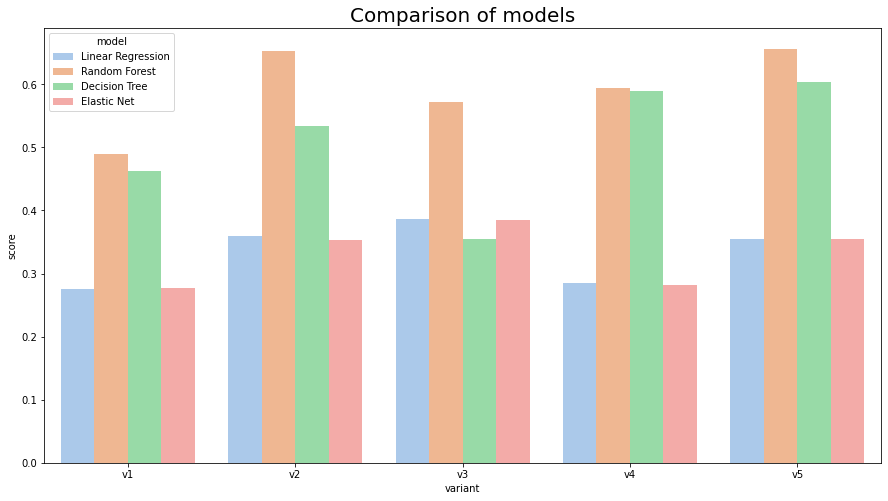

In [79]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='variant', y='score', hue='model',data=df_compare, palette=sns.color_palette("pastel") )
plt.title('Comparison of models',size=20)